<a href="https://colab.research.google.com/github/derzhavin3016/CompMath/blob/master/Lab1/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя лабораторная работа №1 по вычислительной математике

### Державин Андрей, Б01-909 группа

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

## Объявляем некоторые вспомогательные константы 
 - символ х - для работы sympy
 - машинное $\varepsilon$
 - массив $h$

In [2]:
# Some constants
x_s = sp.symbols('x')
eps = np.finfo(float).eps

def get_h(n):
  return 2 / 2 ** (n)


n_arr = np.arange(1, 21)
h_arr = get_h(n_arr)

## Выводим формулы для погрешностей методов

### Метод 1
$$
\frac{f(x + h) - f(x)}{h} \approx f'(x) + f''(x)\frac{h}{2} \Rightarrow
\Delta_m = f''(x)\frac{h}{2}
$$
Полная погрешность:
$$
\Delta = \boxed{\frac{2\varepsilon}{h} + f''(x)\frac{h}{2}}
$$

### Метод 2
$$
\frac{f(x + h) - f(x)}{h} \approx f'(x) + f''(x)\frac{h}{2} \Rightarrow
\Delta_m = f''(x)\frac{h}{2}
$$
Полная погрешность:
$$
\Delta = \boxed{\frac{2\varepsilon}{h} + f''(x)\frac{h}{2}}
$$

### Метод 3
$$
\frac{f(x + h) - f(x-h)}{2h} \approx f'(x) + f'''(x)\frac{h^2}{6} \Rightarrow
\Delta_m = f'''(x)\frac{h^2}{6}
$$
Полная погрешность:
$$
\Delta = \boxed{\frac{\varepsilon}{h} + f'''(x)\frac{h^2}{6}}
$$

### Метод 4
$$
  \frac{4}{3} \frac{f(x + h) - f(x  - h)}{2h}
  - \frac{1}{3} \frac{f(x + 2h) - f(x  - 2h)}{4h} \approx 
  \frac{4}{3} \left( f'(x) + f^{(5)}(x) \cdot h^4 / 120 \right) - 
  \frac{1}{3} \left( f'(x) + f^{(5)}(x) \cdot 16h^4 / 120 \right) \Rightarrow
  $$$$
  \Delta_{m} = f^{(5)}(x) \cdot \frac{h^4}{3\cdot 120} \left(4-16 \right) = 
  -f^{(5)}(x) \cdot \frac{h^4}{30} 
$$
Полная погрешность:
$$
\Delta = \frac{4\varepsilon}{3h} - \frac{1\varepsilon}{6h} -f^{(5)}(x) \cdot \frac{h^4}{30} 
 = \boxed{\frac{3}{2}\frac{\varepsilon}{h} -f^{(5)}(x) \cdot \frac{h^4}{30}}
$$

### Метод 5
$$
  \frac{3}{2} \frac{f(x + h) - f(x  - h)}{2h}
  - \frac{3}{5} \frac{f(x + 2h) - f(x  - 2h)}{4h}+ 
   \frac{1}{10} \frac{f(x + 3h) - f(x  - 3h)}{6h} \approx
  \frac{3}{2} \left( f'(x) + f^{(7)}(x) \cdot \frac{h^6}{5040} \right) - 
  \frac{3}{5} \left( f'(x) + f^{(7)}(x) \cdot 64\frac{h^6}{5040} \right) +
  \frac{1}{10} \left( f'(x) + f^{(7)}(x) \cdot 729\frac{h^6}{5040} \right) 
   \Rightarrow
  $$$$
  \Delta_{m} = f^{(7)}(x) \cdot \frac{h^6}{10 \cdot 5040} 
  \left(15 -  384 +729\right) = 
  f^{(7)}(x) \cdot \frac{h^6}{140}  
$$
Полная погрешность:
$$
\Delta = \frac{3\varepsilon}{2h} + \frac{3\varepsilon}{10h} + 
\frac{\varepsilon}{30h}
+f^{(7)}(x) \cdot \frac{h^6}{140}
 = \boxed{\frac{11}{6}\frac{\varepsilon}{h} + f^{(7)}(x) \cdot \frac{h^6}{140}}
$$

## Реализуем полученные погрешности в функциях
- Функции являются функциями из `sympy`, каждой функции погрешности передается такая функция, точка, а также шаг.

In [3]:
def err_1(f, x, h):
  return sp.diff(f, x_s, 2).subs(x_s, x).doit() * h  / 2 + 2 * eps / h

def err_2(f, x, h):
  return 2 * eps / h - sp.diff(f, x_s, 2).subs(x_s, x).doit() * h / 2

def err_3(f, x, h):
  return eps / h + sp.diff(f, x_s, 3).subs(x_s, x) * h * h / 6

def err_4(f, x, h):
  delta_round =  4 / 3 * eps / h + 1 / 3 * eps / (2 * h)
  meth_delta = - sp.diff(f, x_s, 5).subs(x_s, x) * h * h * h * h / 30 
  return delta_round + meth_delta

def err_5(f, x, h):
  delta_round =  1.5 * eps / h + 0.6 * eps / (2 * h) + 0.1 * eps / (3 * h)
  meth_delta = sp.diff(f, x_s, 7).subs(x_s, x) * h * h * h * h * h * h / 140 
  return delta_round + meth_delta

err_func_list = [err_1, err_2, err_3, err_4, err_5]

## Массив для исследуемых функций

In [4]:
funcs_list = [
  sp.sin(x_s ** 2),
  sp.cos(sp.sin(x_s)),
  sp.exp(sp.sin(sp.cos(x_s))),
  sp.log(x_s + 3),
  (x_s + 3) ** 0.5
]

## Реализуем класс, представляющий метод
- Класс хранит в себе функцию ошибки, получаемую в конструкторе, имеет один метод:
  1. `plot` - строит требуемый график для функции `f` в точке `x`, в качестве функции ошибки используется функция, полученная в конструкторе  

In [45]:
class Method:
  # func : func(x)
  # err : err(f, x, h)
  def __init__(self, err):
    self.__err = err
  
  def plot(self, f, x):
    apply_x = lambda h: self.__err(f, x, h)

    delta_arr = abs(apply_x(h_arr))
    plt.loglog(h_arr, delta_arr, label = f'Method #{self.__err.__name__[-1]}')

## Реализуем функцию, для более удобного построения графиков
Данная функция принимает на вход символьную (`sympy`) функцию `func` и точку `x` (в которой считать производную), после чего строит на одном рисунке графики зависимости шага от погрешности для каждой функции ошибки.

In [46]:
def run_method(func, x = np.pi / 4): 
  for err in err_func_list:
    meth = Method(err)
    meth.plot(func, x)
  plt.legend()
  plt.title(f"f(x) = {str(func)}")
  plt.show()  

## Запустим написанную функцию для каждой из требуемых функций, и получим графики

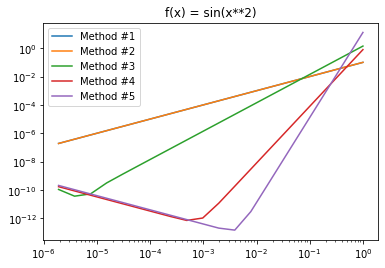

In [47]:
run_method(funcs_list[0])

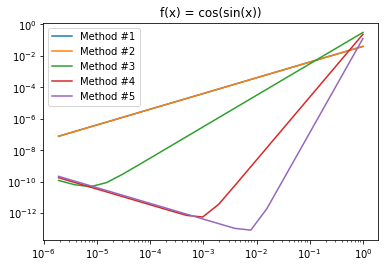

In [48]:
run_method(funcs_list[1])

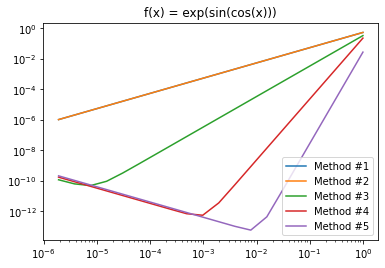

In [49]:
run_method(funcs_list[2])

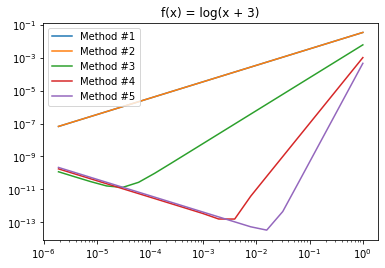

In [50]:
run_method(funcs_list[3])

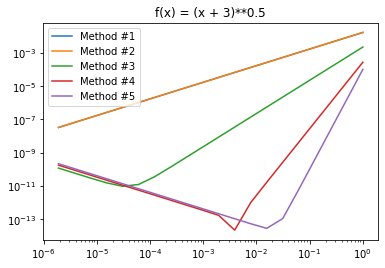

In [51]:
run_method(funcs_list[4])